In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
subs = pd.read_csv("data/auctions.csv", dtype = {"platform": np.int8, "ref_type_id": np.int8, "source_id": np.int8}, usecols = ['date', 'platform', 'source_id'])
clks = pd.read_csv("data/clicks.csv.gzip", dtype = {"advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "wifi_connection": bool, "carrier_id": np.float16, "brand": np.float16, "touchX": np.float16, "touchY": np.float16})

In [4]:
#Vconvierto las fechas a formato datetime
subs['date']=pd.to_datetime(subs['date'])
clks['created']=pd.to_datetime(clks['created'])

# Análisis sobre los clicks

In [5]:
clks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,2.634000e+04,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,inf,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.481445,230.403309,0.639160,1.478516,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,1.024019e+03,0.004484,0.001896,7.015625e+00,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583008,976.849149,0.302002,2.623047,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000e+00,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000e+00,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426025,0.182983,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000e+00,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726074,0.645020,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,1.300000e+01,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.900879,0.991211,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,1.160000e+02,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.593750,6.323872e+18,9.221118e+18


In [6]:
clks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525


In [7]:
clks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [8]:
clks.memory_usage(deep = True).sum()

4980419

## ¿Cómo se distribuye el tiempo que tardan los usuarios en dar click?

In [9]:
clks.count()

advertiser_id      26351
action_id              0
source_id          26351
created            26351
country_code       26351
latitude           26351
longitude          26351
wifi_connection    26351
carrier_id         26340
trans_id           26351
os_minor           26339
agent_device        3243
os_major           26339
specs_brand        26351
brand               6235
timeToClick        22977
touchX             23011
touchY             23011
ref_type           26351
ref_hash           26351
dtype: int64

In [10]:
clks['timeToClick'].isnull().count()

26351

In [11]:
clickTime = clks['timeToClick'].dropna()

In [12]:
clickTime.count()

22977

In [13]:
clickTime.nlargest(5)

23818    17616.188
5606     16915.195
13465    16698.536
14350    16466.667
15691    15776.097
Name: timeToClick, dtype: float64

In [14]:
clickTime.nsmallest(5)

22355    0.017
8827     0.026
22833    0.026
15298    0.029
3516     0.034
Name: timeToClick, dtype: float64

# Analizo como se distribuyen los clicks en el tiempo

In [24]:
clks['año'] = pd.DatetimeIndex(clks['created']).year
clks['mes'] =clks['created'].dt.month
clks['día'] = clks['created'].dt.day
clks['hora'] = clks['created'].dt.hour
clks['minuto'] = clks['created'].dt.minute
clks['diaSemana'] = clks['created'].dt.weekday_name
clks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,touchX,touchY,ref_type,ref_hash,año,mes,día,hora,minuto,diaSemana
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,0.904785,0.078003,1891515180541284343,1904083516767779093,2019,3,6,22,42,Wednesday
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,NaN,1891515180541284343,3086509764961796666,2019,3,8,10,24,Friday
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,0.945801,0.472900,1891515180541284343,6958163894863846647,2019,3,8,15,24,Friday
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,0.035004,0.430908,1891515180541284343,4368617728156436525,2019,3,6,3,8,Wednesday
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,0.053986,0.423096,1891515180541284343,4368617728156436525,2019,3,6,3,32,Wednesday


In [25]:
grupo_clicks_por_dia=clks.groupby(['diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Total clicks").reset_index()
grupo_clicks_por_dia.head(10) 

,diaSemana,Total clicks
0,Tuesday,5235
1,Monday,4557
2,Sunday,3966
3,Wednesday,3482
4,Saturday,3283
5,Thursday,2989
6,Friday,2839


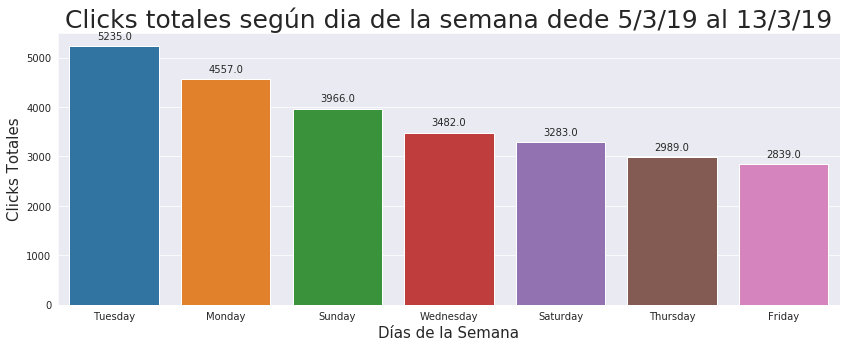

In [55]:
ax = sns.barplot(x='diaSemana', y='Total clicks', data=grupo_clicks_por_dia)
ax.set_title('Clicks totales según dia de la semana dede 5/3/19 al 13/3/19', fontsize = 25)
ax.set_xlabel("Días de la Semana", fontsize = 15)
ax.set_ylabel("Clicks Totales", fontsize = 15)
ax.figure.set_size_inches(14, 5)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Vemos que los dias martes, lunes y domingos son los días que se efectuan más clicks

In [27]:
grupo_clicks_por_hora=clks.groupby(['hora'])['diaSemana'].count().sort_values(ascending=False).rename("Total clicks").reset_index()
grupo_clicks_por_hora.head(10) 

,hora,Total clicks
0,1,4209
1,23,2726
2,2,2327
3,11,1455
4,22,1386
5,12,1199
6,10,1143
7,4,1079
8,16,966
9,15,959


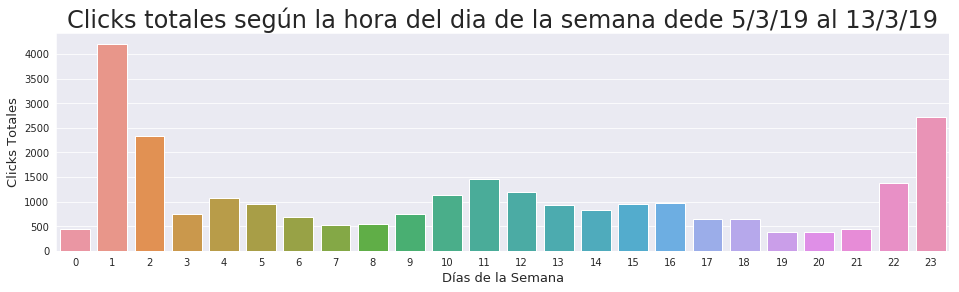

In [63]:
ax = sns.barplot(x='hora', y='Total clicks', data=grupo_clicks_por_hora)
ax.set_title('Clicks totales según la hora del dia de la semana dede 5/3/19 al 13/3/19', fontsize = 24)
ax.set_xlabel("Días de la Semana", fontsize = 13)
ax.set_ylabel("Clicks Totales", fontsize = 13)
ax.figure.set_size_inches(16, 4)

Vemos que las horas en las cuales los usuarios hacen más clicks son: 1 23 y 2 de la mañana

In [29]:
grupo_clicks_por_dia_hora=clks.groupby(['diaSemana','hora'])['hora'].count().sort_values(ascending=False).rename("Total clicks").reset_index()
grupo_clicks_por_dia_hora.head(5) 

,diaSemana,hora,Total clicks
0,Thursday,23,2172
1,Saturday,1,1154
2,Friday,1,988
3,Sunday,2,887
4,Monday,1,878


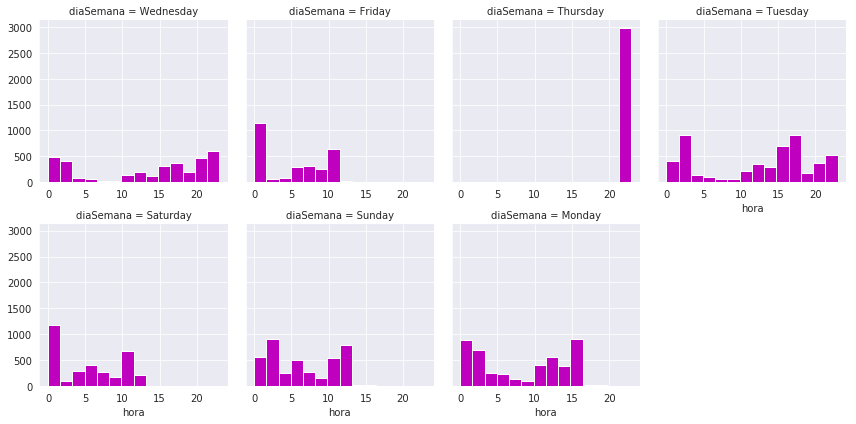

In [30]:
grid = sns.FacetGrid(clks,col="diaSemana", col_wrap=4, margin_titles=True,sharex=False)

grid.map(plt.hist,"hora",bins=np.linspace(0, 23,15),color="m");


En los graficos anteriores vemos que la disrtibución de los clicks para cada dia según la hora

# Análisis sobre las subastas

## Veo que información puedo obtener de los días y horarios en que se realizan las subastas

In [33]:
subs.memory_usage(deep=True).sum()

195713270

In [34]:
subs['año'] = pd.DatetimeIndex(subs['date']).year.astype('category')
subs['mes'] =subs['date'].dt.month.astype('category')
subs['día'] = subs['date'].dt.day.astype('category')
subs['hora'] = subs['date'].dt.hour.astype('category')
subs['minuto'] = subs['date'].dt.minute.astype('category')
subs['diaSemana'] = subs['date'].dt.weekday_name.astype('category')
subs.head()

,date,platform,source_id,año,mes,día,hora,minuto,diaSemana
0,2019-03-11 14:18:33.290763,1,0,2019,3,11,14,18,Monday
1,2019-03-11 14:18:34.440157,1,0,2019,3,11,14,18,Monday
2,2019-03-11 14:18:35.862360,1,0,2019,3,11,14,18,Monday
3,2019-03-11 14:18:36.167163,1,0,2019,3,11,14,18,Monday
4,2019-03-11 14:18:37.728590,1,0,2019,3,11,14,18,Monday


In [38]:
grupo_subastas_por_hora=subs.groupby(['hora'])['diaSemana'].count().sort_values(ascending=False).rename("Total subastas").reset_index()
grupo_subastas_por_hora.head(10) 

,hora,Total subastas
0,2,1388464
1,1,1371091
2,23,1173841
3,22,1108219
4,3,1027541
5,21,1015053
6,0,1005716
7,19,994381
8,18,989528
9,17,967539


In [39]:
grupo_auctions_por_dia=subs.groupby(['diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalauctions").reset_index()
grupo_auctions_por_dia.head() 

,diaSemana,Totalauctions
0,Wednesday,3971343
1,Tuesday,3962311
2,Sunday,2637534
3,Monday,2574916
4,Friday,2303002


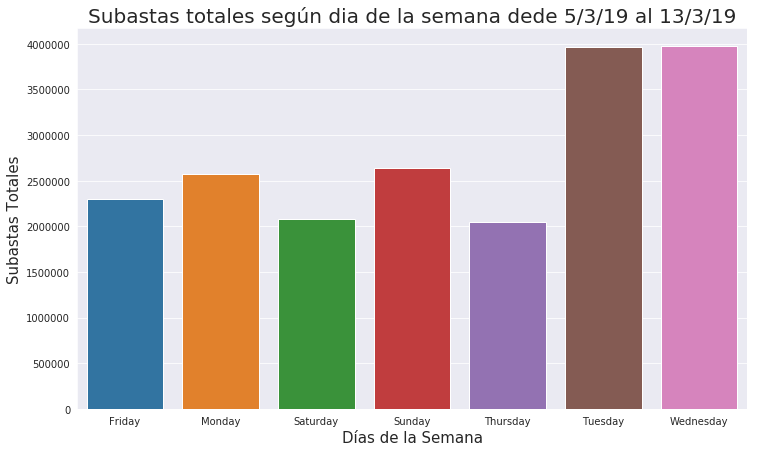

In [53]:
ax = sns.barplot(x='diaSemana', y='Totalauctions', data=grupo_auctions_por_dia)
ax.set_title('Subastas totales según dia de la semana dede 5/3/19 al 13/3/19', fontsize = 20)
ax.set_xlabel("Días de la Semana", fontsize = 15)
ax.set_ylabel("Subastas Totales", fontsize = 15)
ax.figure.set_size_inches(12, 7)

In [41]:
subs['hora']=subs['hora'].astype('int8')

In [42]:
grupo_auctions_por_hora=subs.groupby(['diaSemana','hora'])['hora'].count().sort_values(ascending=False).rename("Subastas totales").reset_index()
grupo_auctions_por_hora.head(5) 

,diaSemana,hora,Subastas totales
0,Tuesday,1,356341
1,Wednesday,1,333339
2,Wednesday,2,329299
3,Tuesday,2,318415
4,Tuesday,23,248071


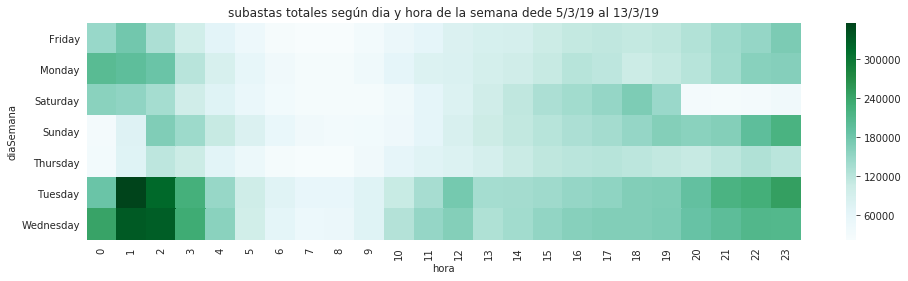

In [43]:
df2 = grupo_auctions_por_hora[['diaSemana', 'hora','Subastas totales']]
heatmap2_data = pd.pivot_table(df2,values='Subastas totales', index=['diaSemana'], columns={'hora'})
heatmap2_data.head(n=5)
ax=sns.heatmap(heatmap2_data, cmap="BuGn")
ax.set_title('subastas totales según dia y hora de la semana dede 5/3/19 al 13/3/19')
ax.figure.set_size_inches(16, 4)

En el grafico anterior se puede ver un heat map de las subastas por dia y hora. Se ve que las subastas se son mayores en los dias martes y miercoles . La horas picos son de entre las 0 y las 3 am

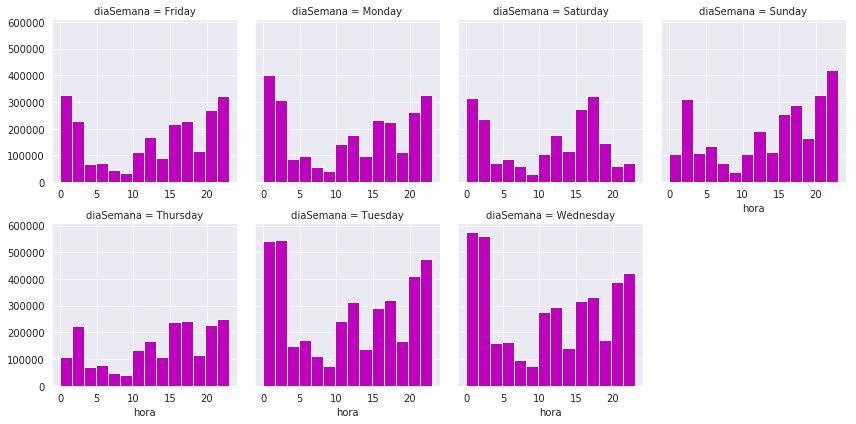

In [44]:
grid = sns.FacetGrid(subs,col="diaSemana", col_wrap=4, margin_titles=True,sharex=False)

grid.map(plt.hist,"hora",bins=np.linspace(0, 23,15),color="m");

In [56]:
subs['day'] = pd.to_datetime(subs['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
subs['hour'] = pd.to_datetime(subs['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour
subs_counts = subs.groupby(['day', 'hour']).count()
subs_counts = subs_counts.reset_index()
subs_counts.head()

,day,hour,date,platform,source_id,año,mes,día,hora,minuto,diaSemana
0,5,0,14859,14859,14859,14859,14859,14859,14859,14859,14859
1,5,1,174893,174893,174893,174893,174893,174893,174893,174893,174893
2,5,2,155339,155339,155339,155339,155339,155339,155339,155339,155339
3,5,3,108498,108498,108498,108498,108498,108498,108498,108498,108498
4,5,4,74230,74230,74230,74230,74230,74230,74230,74230,74230
